# Analysis of house price forecasts and influencing factors


Author: Yuhao Jiao

Course Project, UC Irvine, Math 10, S24

I would like to post my notebook on the course’s website. Yes

# Introduction

Growing up, I watched my parents struggle with the complexities of buying a home, often overwhelmed by price fluctuations and the unclear factors that influence those changes. This personal experience sparked my interest in understanding what really influences home prices and how to accurately predict them. In this project, I analyzed various elements in a housing dataset and attempted to build a model to predict home prices. This research aims to simplify the home buying process and provide clearer insights to potential buyers.

## Data Cleaning

We checked the dataset for any missing values to ensure data quality and completeness. Fortunately, the dataset does not contain any missing values, which simplifies the data preprocessing steps.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Housing.csv')

print(data.head())

print(data.info())


missing_values = data.isnull().sum()
print(missing_values)


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [24]:
import pandas as pd

print(data.head())
print(data.columns)

data = data.iloc[:, :-1]

print(data.head())
print(data.columns)

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'baseme

In [25]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no
541,1767150,2400,3,1,1,no,no,no,no,no,0,no
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no
543,1750000,2910,3,1,1,no,no,no,no,no,0,no


Since there are no missing values, we can proceed with further data preprocessing and feature engineering steps without the need for imputation.

To make it easier for us to view the data, I've converted the yes/no inside the dataset to 1/0. This makes it easier for us to view and analyze the data.

In [26]:
yes_no = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
data[yes_no] = data[yes_no].replace({'yes': 1,'no':0})


## Let's start by analyzing whether there is a relationship between price and area.

### Bar plot for 'price' distribution

C:\Users\ClaireJiao\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


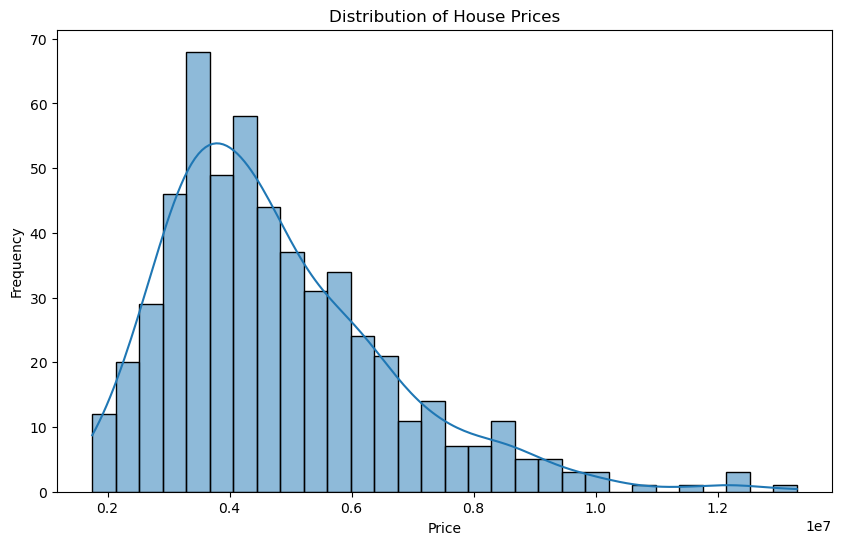

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Bar plot for 'area' distribution

C:\Users\ClaireJiao\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


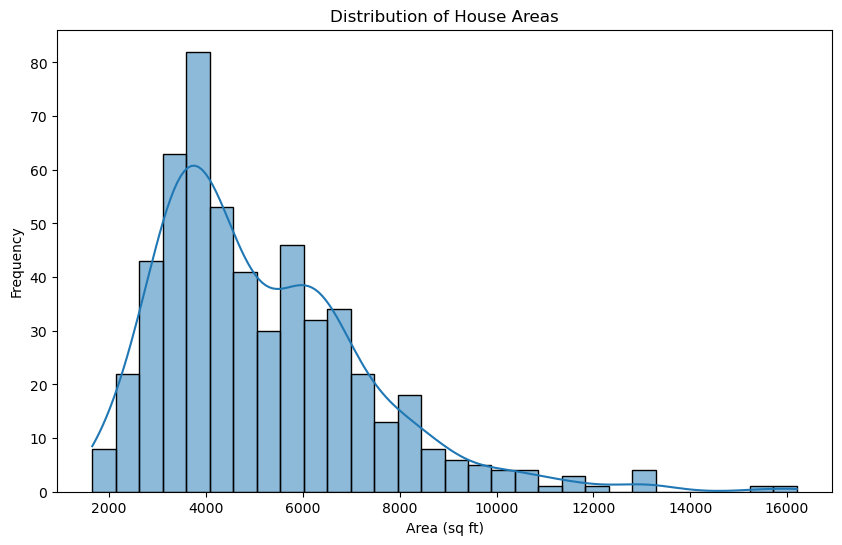

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data['area'], bins=30, kde=True)
plt.title('Distribution of House Areas')
plt.xlabel('Area (sq ft)')
plt.ylabel('Frequency')
plt.show()

### Scatter plot with regression line to analyze the relationship between price and area. Then calculate the correlation between price and area

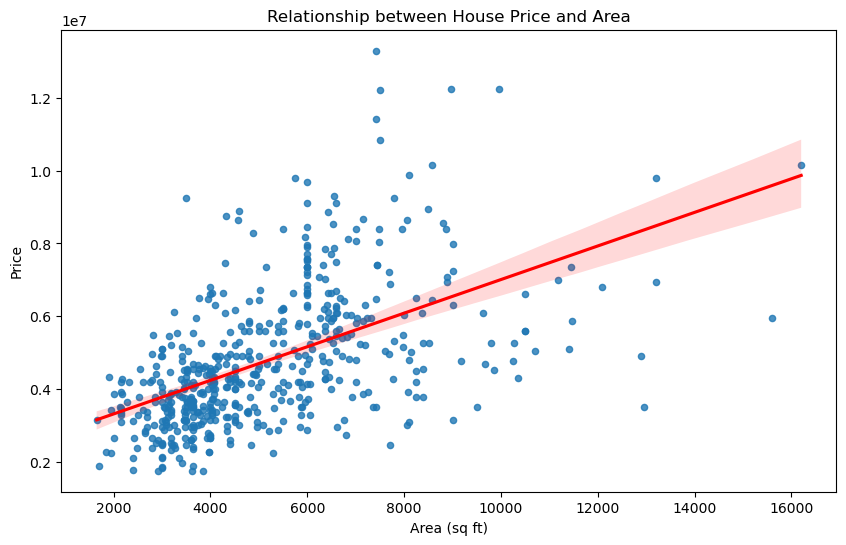

0.5359973457780797

In [29]:

plt.figure(figsize=(10, 6))
sns.regplot(x=data['area'], y=data['price'], scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.title('Relationship between House Price and Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.show()

correlation = data[['price', 'area']].corr().iloc[0, 1]
correlation


Based on the analysis of the relationship between house price and area, we observe a positive correlation between these two variables. The scatter plot with a regression line shows that as the area of the house increases, the price also tends to increase. The red regression line indicates this upward trend. Although there is some dispersion around the regression line, the overall trend is clear.

The Pearson correlation coefficient between house price and area is 0.536, indicating a moderate positive correlation. This suggests that larger houses generally have higher prices.

#### Group by number of bedrooms and calculate the mean and median prices

In [30]:
bedroom_stats = data.groupby('bedrooms')['price'].agg(['mean', 'median']).reset_index()
print(bedroom_stats)

   bedrooms          mean     median
0         1  2.712500e+06  2712500.0
1         2  3.632022e+06  3535000.0
2         3  4.954598e+06  4620000.0
3         4  5.729758e+06  5250000.0
4         5  5.819800e+06  5582500.0
5         6  4.791500e+06  4791500.0


Overall, home prices tend to increase as the number of bedrooms increases. This trend is particularly evident in one- to four-bedroom homes, with both average and median prices showing significant increases. However, price increases for five-bedroom homes were relatively modest. Interestingly, prices for six-bedroom homes have fallen, suggesting that where the number of bedrooms is extreme, prices may be influenced more by other factors such as location and home amenities.It is worth noting that there is a significant increase in prices from one to four bedroom houses, suggesting that the number of bedrooms is positively correlated with house prices. While five-bedroom houses are more expensive than four-bedroom houses, the increase is small.The decline in prices for six-bedroom houses may be due to a smaller sample size or the influence of other housing characteristics.


### Group by number of Bathrooms and calculate the mean and median prices

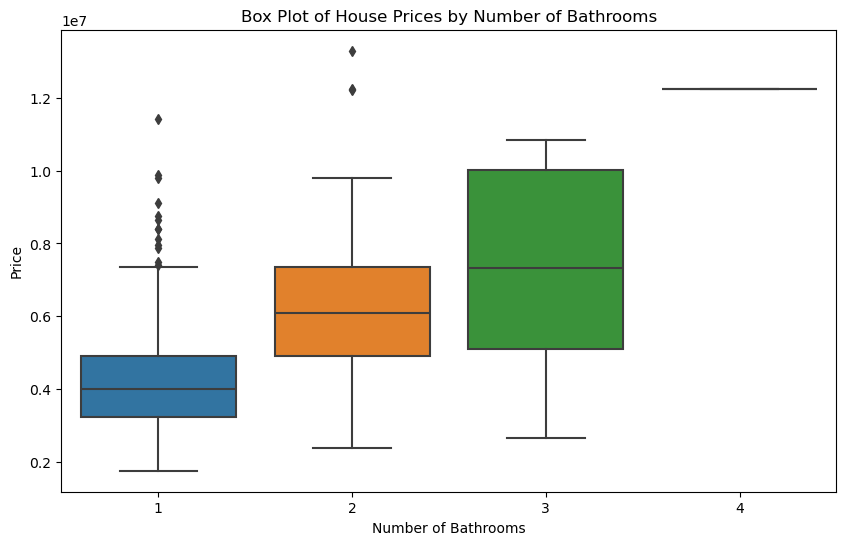

   bathrooms          mean      median
0          1  4.206913e+06   3990000.0
1          2  6.209206e+06   6090000.0
2          3  7.282100e+06   7315000.0
3          4  1.225000e+07  12250000.0
Correlation between price and number of bathrooms: 0.517545339455012


In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bathrooms', y='price', data=data)
plt.title('Box Plot of House Prices by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

bathroom_stats = data.groupby('bathrooms')['price'].agg(['mean', 'median']).reset_index()
print(bathroom_stats)

correlation_bathrooms = data[['price', 'bathrooms']].corr().iloc[0, 1]
print(f"Correlation between price and number of bathrooms: {correlation_bathrooms}")



Based on the analysis, I think the number of bathrooms has a significant positive impact on house prices. The box plot and grouped statistics show that as the number of bathrooms increases, house prices tend to rise. Houses with three or four bathrooms are notably more expensive than those with one or two bathrooms. The mean prices for one, two, three, and four bathrooms are approximately 4.21 million, 6.21 million, 7.28 million, and 12.25 million, respectively. The Pearson correlation coefficient between the number of bathrooms and house prices is 0.518, indicating a moderate positive correlation. Thus, more bathrooms generally correspond to higher house prices.

### Box plot to show the distribution of prices for different numbers of stories

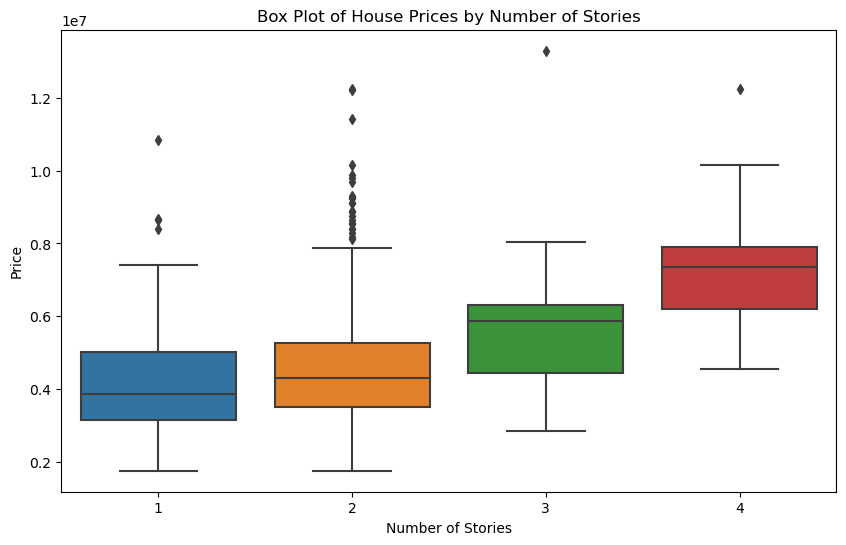

   stories          mean     median
0        1  4.170659e+06  3850000.0
1        2  4.764074e+06  4308500.0
2        3  5.685436e+06  5873000.0
3        4  7.208450e+06  7350000.0
Correlation between price and number of stories: 0.42071236618861724


In [32]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='stories', y='price', data=data)
plt.title('Box Plot of House Prices by Number of Stories')
plt.xlabel('Number of Stories')
plt.ylabel('Price')
plt.show()

story_stats = data.groupby('stories')['price'].agg(['mean', 'median']).reset_index()
print(story_stats)

correlation_stories = data[['price', 'stories']].corr().iloc[0, 1]
print(f"Correlation between price and number of stories: {correlation_stories}")


According to the analysis, the number of floors has a significant positive impact on house prices. Box plots and grouped statistics show that house prices tend to increase as the number of floors increases. Houses with four floors are significantly more expensive than those with fewer floors. The average prices for one, two, three and four storeys were about 4.17 million, 4.76 million, 5.69 million and 7.21 million respectively. The Pearson correlation coefficient between the number of floors and the price of a house is 0.421, indicating a moderate positive correlation. Thus, more stories usually correspond to higher house prices.

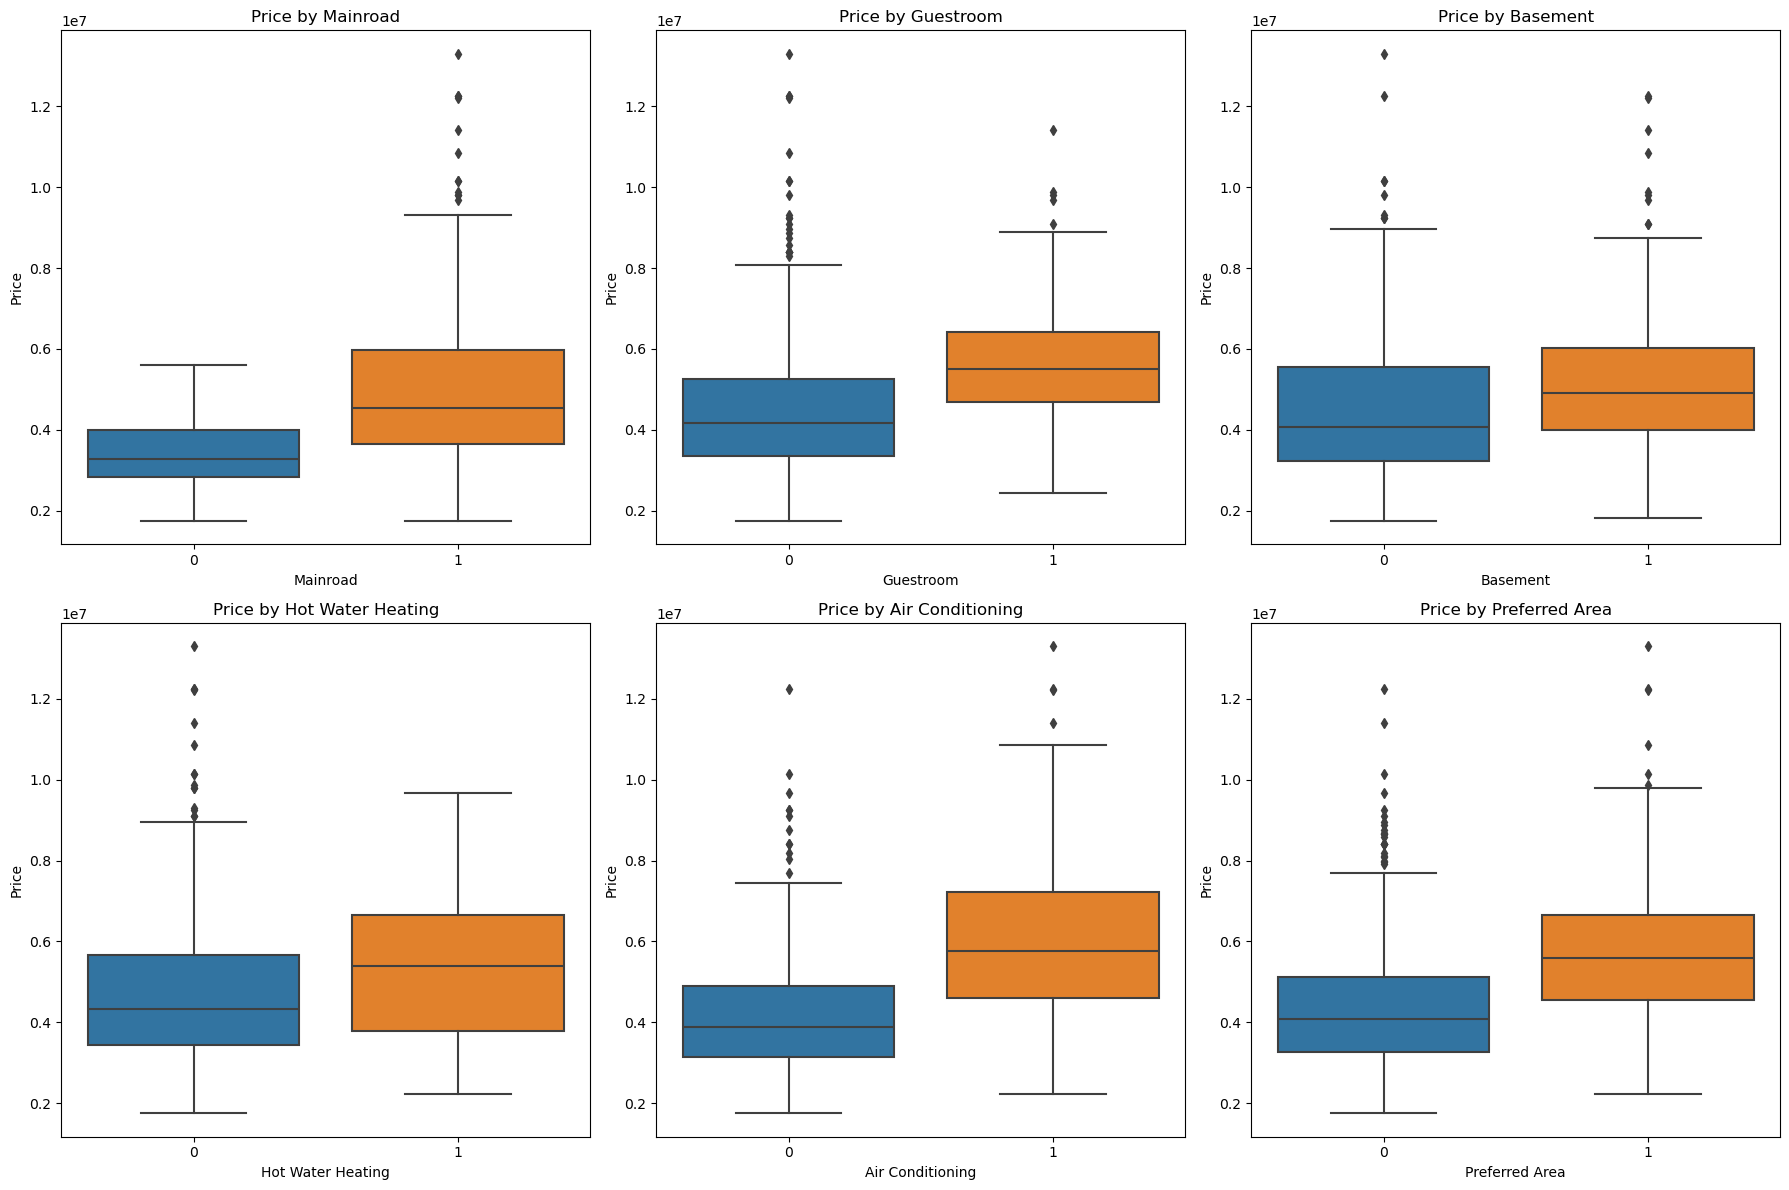

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot for mainroad
sns.boxplot(x='mainroad', y='price', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Price by Mainroad')
axes[0, 0].set_xlabel('Mainroad')
axes[0, 0].set_ylabel('Price')

# Plot for guestroom
sns.boxplot(x='guestroom', y='price', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Price by Guestroom')
axes[0, 1].set_xlabel('Guestroom')
axes[0, 1].set_ylabel('Price')

# Plot for basement
sns.boxplot(x='basement', y='price', data=data, ax=axes[0, 2])
axes[0, 2].set_title('Price by Basement')
axes[0, 2].set_xlabel('Basement')
axes[0, 2].set_ylabel('Price')

# Plot for hotwaterheating
sns.boxplot(x='hotwaterheating', y='price', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Price by Hot Water Heating')
axes[1, 0].set_xlabel('Hot Water Heating')
axes[1, 0].set_ylabel('Price')

# Plot for airconditioning
sns.boxplot(x='airconditioning', y='price', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Price by Air Conditioning')
axes[1, 1].set_xlabel('Air Conditioning')
axes[1, 1].set_ylabel('Price')

# Plot for prefarea
sns.boxplot(x='prefarea', y='price', data=data, ax=axes[1, 2])
axes[1, 2].set_title('Price by Preferred Area')
axes[1, 2].set_xlabel('Preferred Area')
axes[1, 2].set_ylabel('Price')

plt.tight_layout()
plt.show()


Looking at the images, homes with features such as access to mainroads, guestrooms, basements, hot water heating, air conditioning, and preferred area are usually more expensive than homes without these features. The box plot shows that homes with these attributes have higher median and average prices. These features have a positive impact on house prices. 

# house price prediction model

Based on the above analysis, it is evident that each factor has a relationship with house prices, but it is not an absolute one. Using this data, I attempted to create a model to predict house prices. This endeavor is essential because many people, when buying a house, often do not have a clear idea of how much their property is worth or whether it offers good value for money. Therefore, a house price prediction model based on extensive data becomes highly valuable.

#### Define features and target variable

In [34]:
X = data.drop(columns=['price'])
y = data['price']

#### Split the data into training and testing sets


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

### Standardize the features

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Using multiple models for house price prediction is essential because each model has its own strengths and weaknesses. Different models handle data characteristics in various ways. By comparing models, we can balance the bias-variance tradeoff, enhancing prediction accuracy. Employing multiple models ensures robustness and reliability, as relying on a single model might be sensitive to specific features or data anomalies. Additionally, different models can highlight the importance of various features, offering a deeper understanding of the data. Evaluating models using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² score helps determine the best performing model for our dataset. So I have created several common models and evaluated the models through a number of metrics.








##### LinearRegression

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

y_pred_lr = lin_reg_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print('Linear Regression Model:')
print(f'Mean Absolute Error: {mae_lr}')
print(f'Mean Squared Error: {mse_lr}')
print(f'R^2 Score: {r2_lr}')

def predict_house_price(features):
    input_data = pd.DataFrame([features])
    missing_cols = set(X.columns) - set(input_data.columns)
    for col in missing_cols:
        input_data[col] = 0
    input_data = input_data[X.columns]
    # Standardize the input data
    input_data = scaler.transform(input_data)
    # Predict the price
    predicted_price = lin_reg_model.predict(input_data)
    return predicted_price[0]

# Example
features = {
    'area': 6000,
    'bedrooms': 3,
    'bathrooms': 1,
    'stories': 2,
    'mainroad': 1,
    'guestroom': 0,
    'basement': 1,
    'hotwaterheating': 0,
    'airconditioning': 0,
    'parking': 2,
    'prefarea': 0,
}

predicted_price = predict_house_price(features)
print(f'Predicted House Price: {predicted_price}')

Linear Regression Model:
Mean Absolute Error: 798515.5241784788
Mean Squared Error: 1155909646499.7634
R^2 Score: 0.6724986791919084
Predicted House Price: 4843324.073853105


#### KNeighborsRegressor

In [50]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('KNN model')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
def predict_house_price_knn(features):
    input_data = pd.DataFrame([features])
    missing_cols = set(X.columns) - set(input_data.columns)
    for col in missing_cols:
        input_data[col] = 0
    input_data = input_data[X.columns]
    input_data = scaler.transform(input_data)
    predicted_price = knn_model.predict(input_data)
    return predicted_price[0]

# Example
features = {
    'area': 6000,
    'bedrooms':3 ,
    'bathrooms': 1,
    'stories': 2,
    'mainroad': 1,
    'guestroom': 0,
    'basement': 1,
    'hotwaterheating': 0,
    'airconditioning': 0,
    'parking': 2,
    'prefarea': 0,
}

predicted_price_knn = predict_house_price_knn(features)
print(f'Predicted House Price using KNN: {predicted_price_knn}')

KNN model
Mean Absolute Error: 845348.256880734
Mean Squared Error: 1346903737931.0825
R^2 Score: 0.6183847461524965
Predicted House Price using KNN: 4298000.0


#### Ridge Regression Model

In [40]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print('Ridge Regression Model:')
print(f'Mean Absolute Error: {mae_ridge}')
print(f'Mean Squared Error: {mse_ridge}')
print(f'R^2 Score: {r2_ridge}')

def predict_house_price(features):
    input_data = pd.DataFrame([features])
    missing_cols = set(X.columns) - set(input_data.columns)
    for col in missing_cols:
        input_data[col] = 0
    input_data = input_data[X.columns]
    input_data = scaler.transform(input_data)
    predicted_price = ridge_model.predict(input_data)
    return predicted_price[0]

# Example
features = {
    'area': 6000,
    'bedrooms': 4,
    'bathrooms': 1,
    'stories': 2,
    'mainroad': 1,
    'guestroom': 0,
    'basement': 1,
    'hotwaterheating': 0,
    'airconditioning': 0,
    'parking': 2,
    'prefarea': 0,
    'furnishingstatus': 'semi-furnished'
}

predicted_price = predict_house_price(features)
print(f'Predicted House Price: {predicted_price}')


Ridge Regression Model:
Mean Absolute Error: 798172.2402366356
Mean Squared Error: 1155425988767.3457
R^2 Score: 0.672635712866353
Predicted House Price: 4944419.638011852


Based on the analysis of three models—Linear Regression, K-Nearest Neighbors (KNN) Regression, and Ridge Regression—the results indicate varying levels of prediction accuracy. The Linear Regression and Ridge Regression models exhibit similar performance, with Mean Absolute Errors (MAE) of approximately 798,515 and 798,172, respectively, and R² scores around 0.6725. These scores suggest that these models can explain about 67% of the variance in house prices. However, the high Mean Squared Errors (MSE) of over 1.15 trillion indicate significant prediction errors, suggesting that while the models capture some trends, they struggle with precise predictions.

The KNN Regression model performs worse, with a higher MAE of 845,348 and a lower R² score of 0.6184, indicating it explains only about 61% of the variance in house prices. Its MSE is also higher at 1.35 trillion, reinforcing its lower accuracy.

Overall, while Linear and Ridge Regression models show some predictive power, their high MSE values indicate substantial errors, making them less reliable for precise house price predictions.

# Random Forest Regressor

#### Feature importance analysis is a method used in machine learning to understand the decision-making process of a model. By analyzing the importance of features, we can understand which features are most important to the model's predictions. Random Forest Regressor is an integrated decision tree-based approach that improves prediction performance by constructing multiple decision trees and combining their results. Random Forest also has the useful property that it is able to evaluate the importance of each feature. The main reason I used this model was to find out which features are most important for house price prediction. Finally I also wanted to show the importance of each feature through a bar chart.

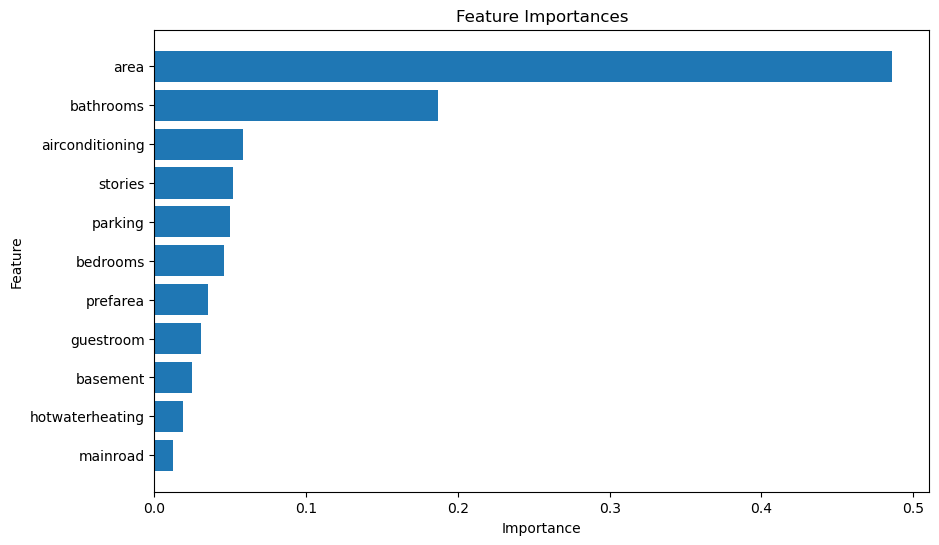

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


The feature importance analysis using a Random Forest Regressor reveals that 'area' is the most significant predictor of house prices, followed by 'bathrooms' and 'airconditioning.' These three features dominate the model's predictive power, indicating that larger houses with more bathrooms and air conditioning tend to be valued higher. Other features like 'stories,' 'parking,' and 'bedrooms' also contribute but are less influential. Interestingly, 'mainroad,' 'hotwaterheating,' and 'basement' have minimal impact on price predictions. This suggests that buyers prioritize spacious and well-equipped homes over other features. Enhancing these key features could potentially increase a property's market value.

# Summary

This project explores the relationship between various characteristics in housing datasets and their impact on house prices. As we have seen, key factors such as size, number of bedrooms, bathrooms and amenities were analyzed. With the exception of size, which is slightly more closely related to price, several of the other factors can only increase the price of a home to some extent and not to the extent that they can be used to predict the price of a home. I attempted to build and evaluate three predictive models - linear regression, K-Nearest Neighbor (KNN) regression, and ridge regression. The results showed that while the linear and ridge regression models showed some predictive power, their high mean squared error indicated significant inaccuracies.The KNN model performed even worse, with larger prediction errors and lower explanatory power. Unfortunately these factors do not allow these models to make an accurate prediction of house prices. I think it's possible that as the dataset grows, it may actually be possible for such models to be successful in the future.




